# Time Series Decomposition

In [1]:
# Import packages

%matplotlib inline
import matplotlib.pylab
import pandas as pd
import numpy as np

In [2]:
# Read in file

data = pd.read_csv('C:\\Users\\britt\\OneDrive\\Desktop\\Unstructured\\Datasets\\patient_ts.csv', index_col = 0)

I want to set the index to the first column since it has the dates and times. Then I want to rename the columns to give them meaning.

In [3]:
data = data.rename(columns={"0":"Patients"})

In [4]:
data.index.name = 'Timestamp'

Checking the data's structure now.

In [5]:
data.head()

,Patients
Timestamp,
2014-01-01 00:00:00,2.0
2014-01-01 01:00:00,2.0
2014-01-01 02:00:00,3.0
2014-01-01 03:00:00,1.0
2014-01-01 04:00:00,1.0


Timestamps and frequency: Year-month-day and then time by hour. 

In [6]:
len(data)

35064

35,064 periods in the data.

In [7]:
data.index

Index(['2014-01-01 00:00:00', '2014-01-01 01:00:00', '2014-01-01 02:00:00',
       '2014-01-01 03:00:00', '2014-01-01 04:00:00', '2014-01-01 05:00:00',
       '2014-01-01 06:00:00', '2014-01-01 07:00:00', '2014-01-01 08:00:00',
       '2014-01-01 09:00:00',
       ...
       '2017-12-31 14:00:00', '2017-12-31 15:00:00', '2017-12-31 16:00:00',
       '2017-12-31 17:00:00', '2017-12-31 18:00:00', '2017-12-31 19:00:00',
       '2017-12-31 20:00:00', '2017-12-31 21:00:00', '2017-12-31 22:00:00',
       '2017-12-31 23:00:00'],
      dtype='object', name='Timestamp', length=35064)

Dates/times are objects and need to be changed to timestamps.

In [8]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S')

In [9]:
data.head()

,Patients
Timestamp,
2014-01-01 00:00:00,2.0
2014-01-01 01:00:00,2.0
2014-01-01 02:00:00,3.0
2014-01-01 03:00:00,1.0
2014-01-01 04:00:00,1.0


In [10]:
data.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=35064, freq=None)

Converting dataframe to Pandas series.

In [11]:
ts = data['Patients']
ts.head(10)

Timestamp
2014-01-01 00:00:00    2.0
2014-01-01 01:00:00    2.0
2014-01-01 02:00:00    3.0
2014-01-01 03:00:00    1.0
2014-01-01 04:00:00    1.0
2014-01-01 05:00:00    2.0
2014-01-01 06:00:00    2.0
2014-01-01 07:00:00    5.0
2014-01-01 08:00:00    5.0
2014-01-01 09:00:00    6.0
Name: Patients, dtype: float64

In [12]:
ts.value_counts()

2.0     5012
3.0     4875
4.0     4685
5.0     4139
1.0     3905
6.0     3518
7.0     2583
0.0     2069
8.0     1830
9.0     1119
10.0     685
11.0     341
12.0     160
13.0      80
14.0      36
15.0      13
16.0       7
17.0       6
19.0       1
Name: Patients, dtype: int64

## Visualizing the Data

As previously covered, the initial plot is not very readable.

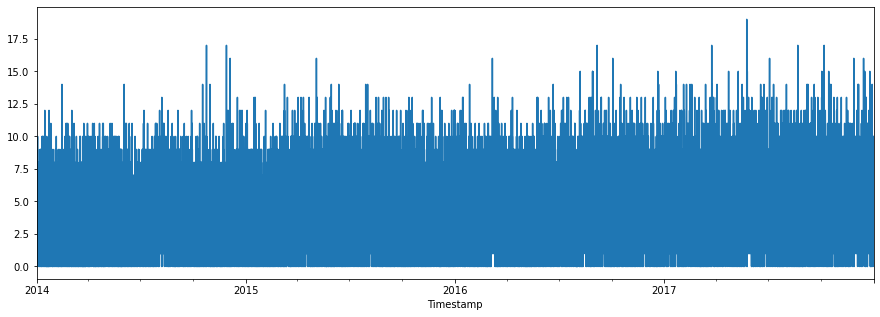

In [13]:
from matplotlib import pyplot

ts.plot(figsize = (15,5))
pyplot.show()

When zooming in on just the first 500 datapoints, it becomes apparent that the data has a cycle during the day. 

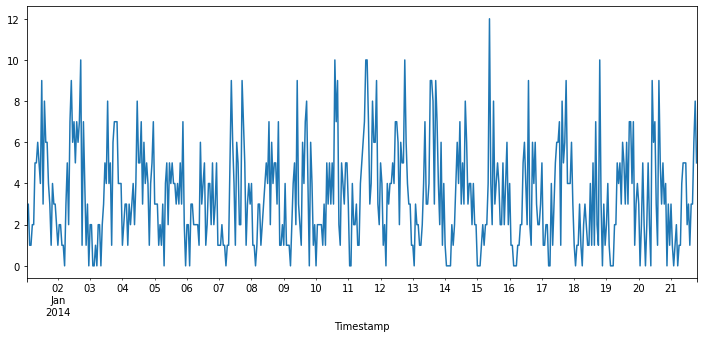

In [14]:
ts[1:500].plot(figsize=(12,5))

When grouped by mean and month, there is a clear pattern of growth over time. 

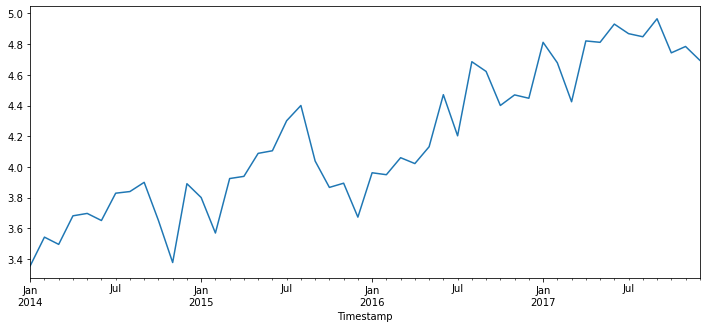

In [15]:
monthly = ts.groupby(pd.Grouper(freq='m')).mean()
monthly.plot(figsize=(12,5))

## Decomposition

In [16]:
# For visualization:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,10))

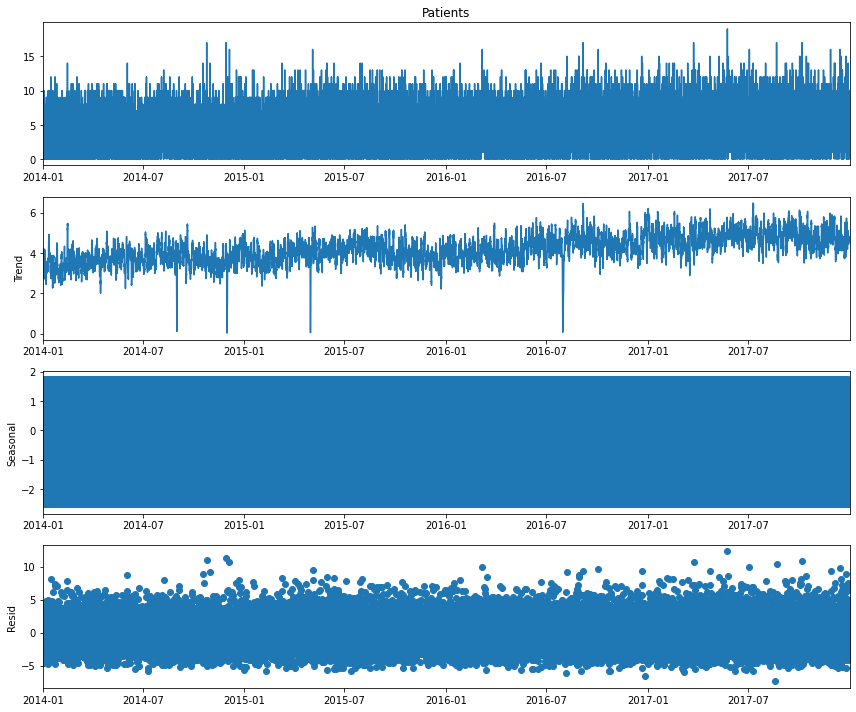

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive')
result.plot()
pyplot.show()

So when I initially did the seasonal decompose on the data as it is, it came out in a very messy and unreadable way. Seasonality is just a blue wall. I decided to replace ts in the model parameters to monthly from the previous visualization section. Now the different elements of the decomposition are understandable in the decomposition below. So, here I will display both result and result_month mean grouping to show the entire plot vs. the monthly mean. The monthly mean looks better for visualization, but I want to keep as much of the data as possible and so I will use result when I get to fitting my models.

The trend section shows a clear linear increase from Jan 2014 to 2017. The seasonality shows dual peaks and a smaller spike between each larger peak. And finally, the noise is evenly spread out over the time series. This is an additive model as the seasonality amplitude stays steady over time and because python wouldn't allow a multiplicative model with zero values in the data.

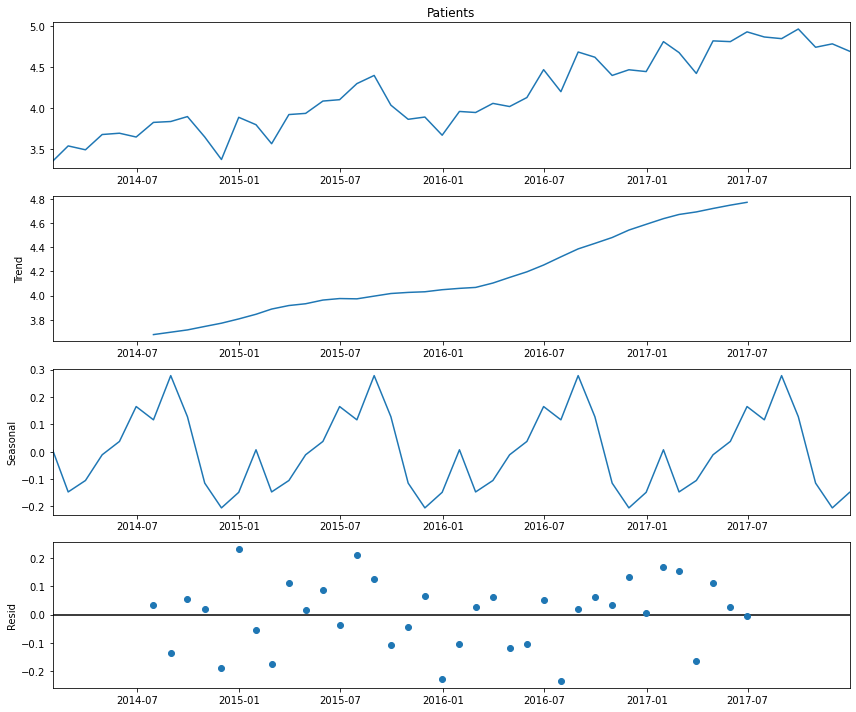

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rc("figure", figsize=(12,10))
result_month = seasonal_decompose(monthly, model='additive')
result_month.plot()
pyplot.show()

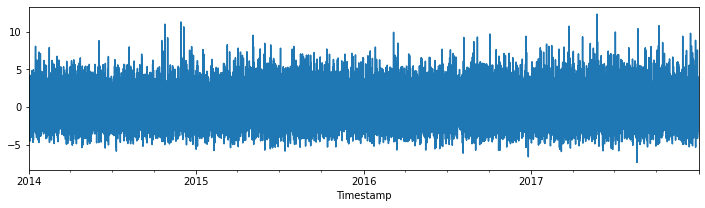

In [19]:
# Changing residual from scatterplot to line graph

plt.rc("figure", figsize=(12,3))
result.resid.plot()

# Fitting a Linear Model

Data is already set up correctly for the most part. 

In [20]:
ts.head()

Timestamp
2014-01-01 00:00:00    2.0
2014-01-01 01:00:00    2.0
2014-01-01 02:00:00    3.0
2014-01-01 03:00:00    1.0
2014-01-01 04:00:00    1.0
Name: Patients, dtype: float64

Reindex columns for forecasting.

In [21]:
ER_df = ts.reset_index()
ER_df.columns = ["Timestamp", "Patients"]
ER_df.head()

,Timestamp,Patients
0,2014-01-01 00:00:00,2.0
1,2014-01-01 01:00:00,2.0
2,2014-01-01 02:00:00,3.0
3,2014-01-01 03:00:00,1.0
4,2014-01-01 04:00:00,1.0


Just going to pull Trend for now. The first 12 rows are NaN and will need to be excluded from the model. Same for the last 12 rows as it was a two-sided window.

In [22]:
ER_df["Trend"] = ER_df['Timestamp'].map(result.trend)
ER_df.head(20)

,Timestamp,Patients,Trend
0,2014-01-01 00:00:00,2.0,NaN
1,2014-01-01 01:00:00,2.0,NaN
2,2014-01-01 02:00:00,3.0,NaN
3,2014-01-01 03:00:00,1.0,NaN
4,2014-01-01 04:00:00,1.0,NaN
5,2014-01-01 05:00:00,2.0,NaN
6,2014-01-01 06:00:00,2.0,NaN
7,2014-01-01 07:00:00,5.0,NaN
8,2014-01-01 08:00:00,5.0,NaN
9,2014-01-01 09:00:00,6.0,NaN


Give hours their own column. This will be the seasonality factor of the second OLS model.

In [23]:
ER_df['Hour'] = [d.time() for d in ER_df['Timestamp']]

In [24]:
ER_df.head()

,Timestamp,Patients,Trend,Hour
0,2014-01-01 00:00:00,2.0,NaN,00:00:00
1,2014-01-01 01:00:00,2.0,NaN,01:00:00
2,2014-01-01 02:00:00,3.0,NaN,02:00:00
3,2014-01-01 03:00:00,1.0,NaN,03:00:00
4,2014-01-01 04:00:00,1.0,NaN,04:00:00


In [25]:
ER_df.dtypes

Timestamp    datetime64[ns]
Patients            float64
Trend               float64
Hour                 object
dtype: object

Changing Hour column to a category for the model to run correctly.

In [26]:
ER_df['Hour'] = ER_df.Hour.astype("category")

In [27]:
ER_df.dtypes

Timestamp    datetime64[ns]
Patients            float64
Trend               float64
Hour               category
dtype: object

## Test/Train Split

In [28]:
ER_train = ER_df.iloc[12:24544,:]
ER_train.head()

,Timestamp,Patients,Trend,Hour
12,2014-01-01 12:00:00,9.0,3.729167,12:00:00
13,2014-01-01 13:00:00,3.0,3.708333,13:00:00
14,2014-01-01 14:00:00,8.0,3.687500,14:00:00
15,2014-01-01 15:00:00,6.0,3.666667,15:00:00
16,2014-01-01 16:00:00,6.0,3.666667,16:00:00


In [29]:
ER_test = ER_df.iloc[24544:35052,:]
ER_test.tail()

,Timestamp,Patients,Trend,Hour
35047,2017-12-31 07:00:00,3.0,4.75,07:00:00
35048,2017-12-31 08:00:00,6.0,4.75,08:00:00
35049,2017-12-31 09:00:00,8.0,4.75,09:00:00
35050,2017-12-31 10:00:00,6.0,4.75,10:00:00
35051,2017-12-31 11:00:00,9.0,4.75,11:00:00


Looks like the data was split correctly. 70/30%

In [30]:
len(ER_df)

35064

In [31]:
len(ER_train)

24532

In [32]:
len(ER_test)

10508

## Ordinary Least Squares

In [33]:
from statsmodels.formula.api import ols

### Trend ONLY

In [34]:
linmodel = ols('Patients ~ Trend', data = ER_train).fit()
p = linmodel.params
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Patients   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1509.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          1.72e-320
Time:                        14:45:41   Log-Likelihood:                -57353.
No. Observations:               24532   AIC:                         1.147e+05
Df Residuals:                   24530   BIC:                         1.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1382      0.106     -1.302      0.193      -0.346       0.070
Trend          1.0351      0.027     38.852      0.000       0.983       1.087
==============================================================================
Omnibus:                     1061.283   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.449
Skew:                           0.542   Prob(JB):                    2.87e-262
Kurtosis:                       3.064   Cond. No.                         28.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This has some really low R scores (~6%), which indicates the model is accounting for very little of the data and there is a lot of noise present.

In [35]:
linpred = linmodel.predict(ER_test)

In [36]:
linfit = linmodel.predict(ER_train)

So, the trained model is the darker blue line and the green represents the prediction model. They are very small in size compared to the actual data and this corresponds to the R-square scores above. Very little of the data is being accounted for by the trend-only model.

[]

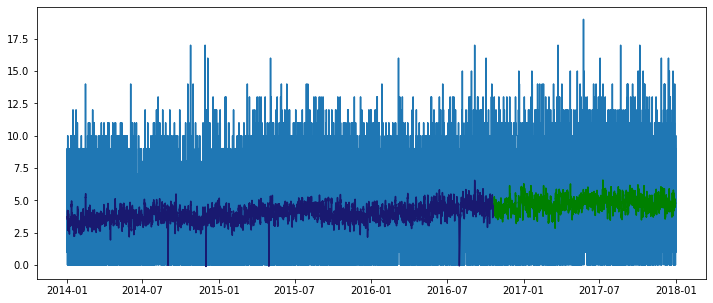

In [37]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ER_df['Timestamp'], ER_df['Patients'])
ax.plot(ER_test['Timestamp'], linpred, 'green')
ax.plot(ER_train['Timestamp'], linfit, 'midnightblue')
ax.plot()

### Measure Mean Square Error and Root Mean Square Error for Trend ONLY

In [38]:
from sklearn.metrics import mean_squared_error

#kwarg 'squared' defaults to True for MSE. Change to False for RMSE!

y_true = ER_df.iloc[12:24544,1]

y_pred = linfit

Examining the MSE and RMSE for the training set. These are somewhat large averages for error and along with the R scores, it seems like error has not been minimalized optimally.

In [39]:
# MSE

print('Mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=True))

Mean squared error: 6.28


In [40]:
# RMSE

print('Root mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=False))

Root mean squared error: 2.51


This has a lot of noise values and very messy. 

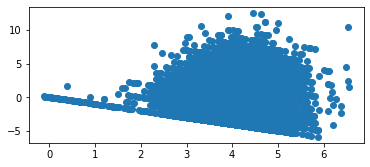

In [41]:
residual = y_true - y_pred
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

MSE and RMSE for the test set.

In [42]:
y_true = ER_df.iloc[24544:35052,1]
y_pred = linpred

The MSE is even larger (more inaccurate) for the test data than the training data. RMSE is about the same.

In [43]:
# MSE

print('Mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=True))

Mean squared error: 8.10


In [44]:
# RMSE

print('Root mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=False))

Root mean squared error: 2.85


### Trend + Seasonal Component

This is a better model, though not perfect. The R-square value indicates only 42% of the data is accounted for by the new model. The F-statistic is zero and that is rather odd.

In [45]:
linmodel = ols('Patients ~ Trend + C(Hour)', data = ER_train).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Patients   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     746.9
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:45:42   Log-Likelihood:                -51352.
No. Observations:               24532   AIC:                         1.028e+05
Df Residuals:                   24507   BIC:                         1.030e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.5505      0.103    -15.107      0.000      -1.752      -1.349
C(Hour)[T.datetime.time(1, 0)]     -0.4960      0.087     -5.710      0.000      -0.666      -0.326
C(Hour)[T.datetime.time(2, 0)]     -0.7642      0.087     -8.797      0.000      -0.934      -0.594
C(Hour)[T.datetime.time(3, 0)]     -0.9374      0.087    -10.790      0.000      -1.108      -0.767
C(Hour)[T.datetime.time(4, 0)]     -1.0490      0.087    -12.075      0.000      -1.219      -0.879
C(Hour)[T.datetime.time(5, 0)]     -1.0813      0.087    -12.448      0.000      -1.252      -0.911
C(Hour)[T.datetime.time(6, 0)]     -0.6715      0.087     -7.730      0.000      -0.842      -0.501
C(Hour)[T.datetime.time(7, 0)]     -0.0249      0.087     -0.286      0.775      -0.195       0.145
C(Hour)[T.datetime.time(8, 0)]      1.2216      0.087     14.062      0.000       1.051       1.392
C(Hour)[T.datetime.time(9, 0)]      2.2165      0.087     25.515      0.000       2.046       2.387
C(Hour)[T.datetime.time(10, 0)]     2.5491      0.087     29.344      0.000       2.379       2.719
C(Hour)[T.datetime.time(11, 0)]     2.7741      0.087     31.934      0.000       2.604       2.944
C(Hour)[T.datetime.time(12, 0)]     2.9372      0.087     33.820      0.000       2.767       3.107
C(Hour)[T.datetime.time(13, 0)]     2.7633      0.087     31.817      0.000       2.593       2.933
C(Hour)[T.datetime.time(14, 0)]     2.7682      0.087     31.875      0.000       2.598       2.938
C(Hour)[T.datetime.time(15, 0)]     2.8015      0.087     32.258      0.000       2.631       2.972
C(Hour)[T.datetime.time(16, 0)]     2.8983      0.087     33.364      0.000       2.728       3.069
C(Hour)[T.datetime.time(17, 0)]     3.0891      0.087     35.560      0.000       2.919       3.259
C(Hour)[T.datetime.time(18, 0)]     2.9080      0.087     33.476      0.000       2.738       3.078
C(Hour)[T.datetime.time(19, 0)]     2.8063      0.087     32.305      0.000       2.636       2.977
C(Hour)[T.datetime.time(20, 0)]     2.6752      0.087     30.796      0.000       2.505       2.845
C(Hour)[T.datetime.time(21, 0)]     2.2701      0.087     26.132      0.000       2.100       2.440
C(Hour)[T.datetime.time(22, 0)]     1.5508      0.087     17.853      0.000       1.381       1.721
C(Hour)[T.datetime.time(23, 0)]     0.7279      0.087      8.379      0.000       0.558       0.898
Trend                               1.0347      0.021     49.574      0.000       0.994       1.076
==============================================================================
Omnibus:                     1213.046   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1573.769
Skew:                           0.496   Prob(J

In [46]:
linpred = linmodel.predict(ER_test)

In [47]:
linfit = linmodel.predict(ER_train)

A bit more of the data is accounted for by both the training and test models. However, based on the new R-square of .42, less than half of the data is accounted for by the models. So while there was a substantial increase in prediction ability, this is not a great model for prediction yet.

[]

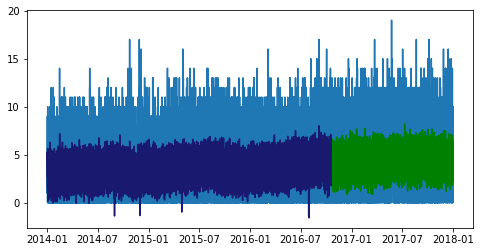

In [48]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ER_df['Timestamp'], ER_df['Patients'])
ax.plot(ER_test['Timestamp'], linpred, 'green')
ax.plot(ER_train['Timestamp'], linfit, 'midnightblue')
ax.plot()
#ax.plot(ER_train['Timestamp'], linmodel, 'r')

Examining the MSE and RMSE for the training set.

In [49]:
y_true = ER_df.iloc[12:24544,1]

y_pred = linfit

The MSE and RMSE have basically been halved (almost), so error was brought down quite a bit.

In [50]:
# MSE

print('Mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=True))

Mean squared error: 3.85


In [51]:
# RMSE

print('Root mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=False))

Root mean squared error: 1.96


Checking residual data

Very similar to Trend only model.

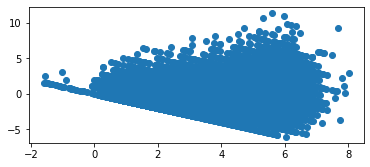

In [52]:
residual = y_true - y_pred
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

Examining the MSE and RMSE for the test set.

In [53]:
y_true = ER_df.iloc[24544:35052,1]
y_pred = linpred

Slightly higher, but about the same for training and test data in this model.

In [54]:
# MSE

print('Mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=True))

Mean squared error: 4.62


In [55]:
# RMSE

print('Root mean squared error: %.2f'
      % mean_squared_error(y_true, y_pred, squared=False))

Root mean squared error: 2.15


Checking residual data

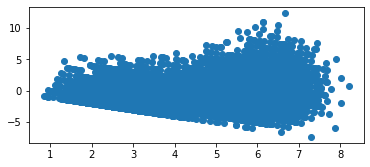

In [56]:
residual = y_true - y_pred
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

So Chodhury and Urena (Choudhury and Urena 2020)were able to get their best model down to an MSE of 1.0 and an RMSE of 1.55. That's pretty good, but I was not able to replicate their results. My better model obviously included both the overall trend of the data plus the seasonality factor and removed the perceived noise. However, my best prediction MSE was 4.62 and RMSE was 2.15. These aren't great and my R-square scores show there is a lot of noise in the data not being handled by the model. The residual plots all show A LOT of values counted as noise, but clearly some of the data is getting lost in the noise and should be accounted for by the model.